###Importing Libraries

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np

###Importing Datasets and Preprocessing


In [2]:
imdb_reviews = pd.read_csv("/content/imdb_reviews.csv")  # will be used for training the model
test_reviews = pd.read_csv("/content/test_reviews.csv")  # will be used for testing the model

In [3]:
imdb_reviews.tail()  # datasets consists of 2 columns , one which consists of reviews and second its corresponding sentiments , positive or negative

,Reviews,Sentiment
24995,<START this is a racist movie but worthy of st...,positive
24996,<START bela lugosi plays a doctor who will do ...,negative
24997,<START in a far away galaxy is a planet called...,negative
24998,<START six degrees had me hooked i looked forw...,positive
24999,<START as a big fan of the original film it's ...,negative


In [4]:
word_index = pd.read_csv("/content/word_indexes.csv") # contains different words which may be present in the reviews which are mapped to numbers (indexes) 

In [5]:
word_index.head()

,Words,Indexes
0,tsukino,52009
1,nunnery,52010
2,sonja,16819
3,vani,63954
4,woods,1411


####Converting word_index csv file into Python Dictionary 

In [6]:
word_index = dict(zip(word_index.Words,word_index.Indexes))   # convert into dict for converting text data into integer format 

####Integer encoding for START , PAD , UNK , UNUSED  in the reviews 

In [7]:
word_index["<PAD>"]=0
word_index["<START"]=1
word_index["<UNK>"]=2
word_index["<UNUSED"]=3

In [8]:
def review_encoder(text):
  arr=[word_index[word] for word in text]
  return arr

#### Labelling data as Train and Test sets

In [9]:
train_data , train_labels = imdb_reviews['Reviews'],imdb_reviews['Sentiment']
test_data , test_labels = test_reviews['Reviews'],test_reviews['Sentiment']

####Splitting the reviews(String) on the basis of white spaces to map individual words to integers

In [10]:
train_data = train_data.apply(lambda review : review.split())
test_data =  test_data.apply(lambda review : review.split())

In [11]:
train_data = train_data.apply(review_encoder)
test_data = test_data.apply(review_encoder)

#### Encoding and Assigning values to positive and negative sentiments

In [12]:
def encode_sentiments(sentiment):
  if sentiment=='positive':
    return 1
  else:  
    return 0

train_labels = train_labels.apply(encode_sentiments)
test_labels  = test_labels.apply(encode_sentiments)

#### Padding of reviews with zeroes with character limit 500  

In [13]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"],padding='post', maxlen=500)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"],padding='post', maxlen=500)

###Building layers in our model , compiling of model

In [14]:
model = keras.Sequential([keras.layers.Embedding(10000,16,input_length=500),
                        keras.layers.GlobalAveragePooling1D(),
                        keras.layers.Dense(16,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')])

In [15]:
model.compile(optimizer='adam', loss ='binary_crossentropy' , metrics=['accuracy'])

In [16]:
history=model.fit(train_data , train_labels , epochs = 30 , batch_size=512 , validation_data =(test_data , test_labels))

Epoch 1/30
49/49 [==============================] - 3s 40ms/step - loss: 0.6924 - accuracy: 0.5898 - val_loss: 0.6912 - val_accuracy: 0.5481
Epoch 2/30
49/49 [==============================] - 2s 36ms/step - loss: 0.6876 - accuracy: 0.6805 - val_loss: 0.6829 - val_accuracy: 0.7211
Epoch 3/30
49/49 [==============================] - 2s 40ms/step - loss: 0.6717 - accuracy: 0.7315 - val_loss: 0.6606 - val_accuracy: 0.7275
Epoch 4/30
49/49 [==============================] - 2s 40ms/step - loss: 0.6376 - accuracy: 0.7696 - val_loss: 0.6196 - val_accuracy: 0.7748
Epoch 5/30
49/49 [==============================] - 2s 42ms/step - loss: 0.5850 - accuracy: 0.7962 - val_loss: 0.5659 - val_accuracy: 0.7971
Epoch 6/30
49/49 [==============================] - 2s 41ms/step - loss: 0.5242 - accuracy: 0.8226 - val_loss: 0.5106 - val_accuracy: 0.8206
Epoch 7/30
49/49 [==============================] - 2s 41ms/step - loss: 0.4651 - accuracy: 0.8463 - val_loss: 0.4613 - val_accuracy: 0.8376
Epoch 8/30
49

### Checking Accuracy and predicting values of random data

In [17]:
loss, accuracy = model.evaluate(test_data , test_labels)  
print(accuracy)

782/782 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.8854
0.8854399919509888


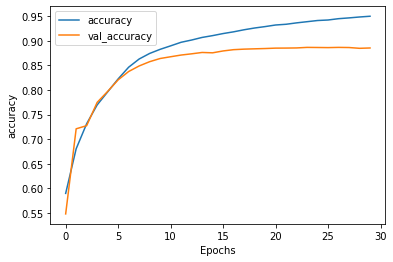

In [18]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_graphs(history, 'accuracy')

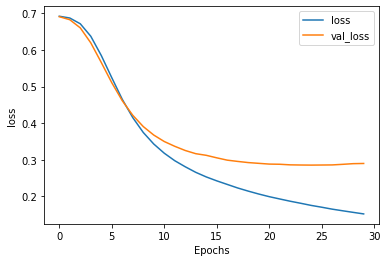

In [19]:
plot_graphs(history, 'loss')

In [20]:
test_reviews.head()

,Reviews,Sentiment
0,<START please give this one a miss br br <UNK>...,negative
1,<START this film requires a lot of patience be...,positive
2,<START many animation buffs consider <UNK> <UN...,positive
3,<START i generally love this type of movie how...,negative
4,<START like some other people wrote i'm a die ...,positive


In [21]:
index=np.random.randint(1,1000)
user_review = test_reviews.loc[index]
print(user_review)

Reviews      <START yeah great cult tv series great atmosph...
Sentiment                                             positive
Name: 124, dtype: object


In [22]:
user_review=test_data[index]
user_review=np.array([user_review])
if (model.predict(user_review)>0.5).astype("int32"):
  print("positive sentiment")
else:  
  print("negative sentiment")

positive sentiment
